# `dctrack`: A Python library to track cells in rtdc files

This notebook gives an example how to use the python library `dctrack` that was created to track the movement of cells through different channel geometries, measured with the software Shape-In 2.

To use the `dctrack` library and this notebook properly, please download the source code under https://gitlab.gwdg.de/freiche/rtdc_tracking2.0 and then navigate in the console to the directory `rtdc_tracking2.0` and install the dctrack package using `python -m pip install dctrack`

This example deals with the tracking of _MMM data_.

In [1]:
import dclab
import dctrack
import pathlib
import numpy as np
import matplotlib.pyplot as plt

c:\users\bhartma\documents\owncloud\phd_stuff\software\rtdc_tracking2.0\dctrack\track.py:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


### Define the path to the rtdc file you want to track

Here we use a file already saved in test suite of dctrack but you can just paste the absolute path of your file.

In [2]:
data_dir = pathlib.Path().cwd().parent / "tests" / "data"
rtdc_path = str(data_dir / "MMM_test_data.rtdc")
print(rtdc_path)

C:\Users\bhartma\Documents\Owncloud\PhD_Stuff\Software\rtdc_tracking2.0\tests\data\MMM_test_data.rtdc


#### Create an `dctrack.track_mmm.TrackedMMM` instance directly from an rtdc file
In contrast to the default tracking, no TrackingSe

In [3]:
mmm = dctrack.track_mmm.TrackedMMM(rtdc_path)

The `TrackedMMM` class contains all the information of the corresponding dclab dataset under `mmm.dataset`:

In [4]:
ds = mmm.dataset
print(f"RTDCBase object: {ds}\n")
print(f"Deformation data: {ds['deform'][:10]} ...\n")
print(f"Config info ('experiment'): {ds.config['experiment']}\n")

RTDCBase object: <RTDC_HDF5 'mm-hdf5_bd37669' at 0x26dd9a9f7f0 (C:\Users\bhartma\Documents\Owncloud\PhD_Stuff\Software\rtdc_tracking2.0\tests\data\MMM_test_data.rtdc)>

Deformation data: [0.02732559 0.04615336 0.04100541 0.05311718 0.05001949 0.04640063
 0.03480712 0.04635655 0.05170986 0.03960054] ...

Config info ('experiment'): {'date': '2022-10-21', 'event count': 101, 'run index': 1, 'sample': 'dcevent_tests', 'time': '10:33:17'}



#### Additional tracking metadata can and should be set before running the `track` function:

The current tracking metadata parameters can be viewed with:

In [5]:
mmm.print_tracking_metadata()

{'flow_direction': 'right',
 'pred_zone_size': 3,
 'roi': [0, 0, 10, 10],
 'channel_path': [],
 'window_size': 5}

Show the image of the channel for clarification

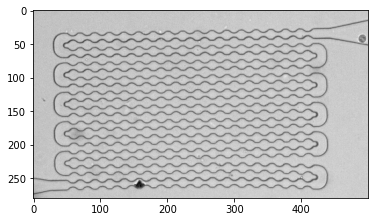

In [6]:
plt.figure()
plt.imshow(mmm.dataset["image"][0], cmap='gray')
plt.show()

What is needed for tracking are:
- Region of Interest (roi)
- channel path
- correct flow direction

Define the regions of the channel. It is recommended to use the automated function for that. Also set the flow direction and get the channel path. THE FLOW DIRECTION HAS TO BE SET CORRECTLY BEFORE OBTAINING THE CHANNEL PATH! Otherwise the path will not be correct and the tracking won't work.
Possible options for the flow direction are `'right'` (default) and `'left'` which indicate the flow __to__ that direction.

In [7]:
mmm.set_roi_automatically()
mmm.set_flow_direction("left")
mmm.get_channel_path()

In [8]:
mmm.print_tracking_metadata()

{'flow_direction': 'left',
 'pred_zone_size': 3,
 'roi': [15, 30, 441, 265],
 'channel_path': array([[430.89383562,  37.95454545],
        [407.85395899,  37.95454545],
        [384.81408236,  37.95454545],
        [361.77420573,  37.95454545],
        [338.7343291 ,  37.95454545],
        [315.69445247,  37.95454545],
        [292.65457584,  37.95454545],
        [269.61469921,  37.95454545],
        [246.57482258,  37.95454545],
        [223.53494595,  37.95454545],
        [200.49506932,  37.95454545],
        [177.45519269,  37.95454545],
        [154.41531606,  37.95454545],
        [131.37543943,  37.95454545],
        [108.3355628 ,  37.95454545],
        [ 85.29568617,  37.95454545],
        [ 62.25580954,  37.95454545],
        [ 39.21593291,  37.95454545],
        [ 39.21593291,  59.86363636],
        [ 62.25580954,  59.86363636],
        [ 85.29568617,  59.86363636],
        [108.3355628 ,  59.86363636],
        [131.37543943,  59.86363636],
        [154.41531606,  59.863636

Plot the channel path

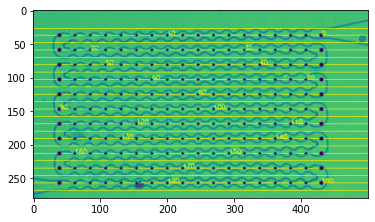

In [9]:
plt.imshow(mmm.img_with_path)
plt.show()

#### Setting other metadata and parameters

Using dedicated `set` functions, other metadata parameters can be set:
- pixel_size: set_pixel_size()
- pred_zone_size: set_pred_zone_size()
- window_size: set_window_size()

Also good to know: Set the output path for export of data and saving results using `set_output_dir()`.

In [10]:
# for example:
mmm.set_window_size(5)
mmm.set_output_dir(pathlib.Path().cwd())

### Tracking

With the preset parameters we can now track the dataset.

In [11]:
mmm.track() # the RankWarning is expected

Tracking cells


100%|██████████| 79/79 [00:00<00:00, 466.24it/s]
c:\users\bhartma\documents\owncloud\phd_stuff\software\rtdc_tracking2.0\dctrack\track_mmm.py:834: RuntimeWarning: invalid value encountered in double_scalars
  ((pos_x[-1] - pos_x[0]) / 1000.) /


The dataset now contains additional features that where assigned after tracking:

In [12]:
print(list(mmm.dataset._usertemp.keys()))

['path_index', 'object_number', 'prediction_zone_start', 'prediction_zone_end', 'obj_area_before', 'obj_area_after', 'obj_deform_before', 'obj_deform_after']


Find the unique object numbers:

In [13]:
unique_object_numbers = np.unique(ds['object_number'])
print(unique_object_numbers)

[1. 2. 3. 4. 5. 6.]


### Export the results

Use the export function `export_tracking_results()` to save the results of the tracking. The parameter "filtered" can be used to only export results of events that made it through the whole channel and where no other event was in the channel at the same time (which could cause pressure differences and therefore different passage times). Data is saved in the output directory specified in mmm.output_dir.

In [14]:
mmm.export_tracking_results(filtered=True)

Starting to export data to .csv file.


The data can then easily be loaded into a pandas dataframe and further analyzed:

In [15]:
import pandas as pd
df = pd.read_csv(mmm.output_dir / "tracked_MMM_data_filtered.csv")
df

index  cell number  first vidframe  last vidframe  passage time [s]  \
0    1.0          1.0           176.0          202.0          0.216667   

   avg velocity [mm/s]  area before [um^2]  area after [um^2]  \
0            27.551352            193.2832                NaN   

   deform before [um^2]  deform after [um^2]  ...  v_row8 [mm/s]  \
0              0.027326                  NaN  ...      29.166805   

   v_row9 [mm/s]  v_row10 [mm/s]  v_row11 [mm/s]  mean passage time [s]  \
0      29.542834        29.41319       29.497493               0.216667   

   median passage time [s]  std passage time [s]  mean velocity [mm/s]  \
0                 0.216667                   0.0             27.551352   

   median velocity [mm/s]  std velocity [mm/s]  
0               27.551352                  0.0  

[1 rows x 27 columns]

### Export the tracked datasets

Datasets can be exported to save the tracking results for further analysis. The exported file is in .rtdc or .hdf5 format and contains all features of the original dataset + the new tracking features and tracking metadata. To limit the size of the exported files, in the default setting only scalar features are exported.

In [16]:
export_path = "example_results_MMM_tracking.rtdc"
mmm.export_tracked_dataset_as_hdf5(export_path, override=True)

#### You can load the exported files either with `dctrack` or `dclab`

In [17]:
mmm_import = dctrack.track_mmm.TrackedMMM(export_path)
print('object_number' in mmm_import.dataset.features)

True


In [18]:
ds_import = dclab.new_dataset(export_path)
print('object_number' in ds_import.features)

True


In [19]:
# mmm_import.dataset.config["User"] is the same as:
ds_import.config["User"]

{'channel_path': array([[430.89383562,  37.95454545],
       [407.85395899,  37.95454545],
       [384.81408236,  37.95454545],
       [361.77420573,  37.95454545],
       [338.7343291 ,  37.95454545],
       [315.69445247,  37.95454545],
       [292.65457584,  37.95454545],
       [269.61469921,  37.95454545],
       [246.57482258,  37.95454545],
       [223.53494595,  37.95454545],
       [200.49506932,  37.95454545],
       [177.45519269,  37.95454545],
       [154.41531606,  37.95454545],
       [131.37543943,  37.95454545],
       [108.3355628 ,  37.95454545],
       [ 85.29568617,  37.95454545],
       [ 62.25580954,  37.95454545],
       [ 39.21593291,  37.95454545],
       [ 39.21593291,  59.86363636],
       [ 62.25580954,  59.86363636],
       [ 85.29568617,  59.86363636],
       [108.3355628 ,  59.86363636],
       [131.37543943,  59.86363636],
       [154.41531606,  59.86363636],
       [177.45519269,  59.86363636],
       [200.49506932,  59.86363636],
       [223.53494595,

In [20]:
print(ds_import.config["User"]["channel_path"][0])
print(type(ds_import.config["User"]["channel_path"][0]))

[430.89383562  37.95454545]
<class 'numpy.ndarray'>


### Writing a video of the tracking results

To get an overview how well the tracking worked, the user can get a video of the tracking results (.avi file).

With the `filtered` option only objects that meet the requirements for good analysis (e.g. they make it from entry to exit of the channel) are labelled.

In [21]:
video_path = 'example_video_MMM_tracking.avi'
mmm.export_video(video_path)

Save exported video to output diretory.


Exporting video: 100%|██████████| 79/79 [00:01<00:00, 43.39it/s]

Finished exporting video.
